# Import Packages

In [1]:
from TopicAnalysis import TopicAnalysis
from SentimentAnalysis import SentimentAnalysis
from DataVisualization import DataVisualization
import pandas as pd
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,4)})

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load Data and Stopwords

In [2]:
#Obama Speech Data Frame
obama = pd.read_csv('obama_speech.csv')
#Stopwords used in this analysis
with open('stop_words_english.txt', encoding='utf-8') as f:
    lines = f.readlines()   
    stopwords = []
    for word in lines:
        stopwords.append(word.strip())

In [3]:
obama

,dates,titles,links,speeches
0,02 Oct 2002,Federal Plaza Address Opposing the War in Iraq,speeches/barackobama/barackobamairaqwarspeechf...,Good afternoon. Let begin by saying that altho...
1,27 Jul 2004,Democratic National Convention Keynote Speech,speeches/convention2004/barackobama2004dnc.htm,"On behalf of the great state of Illinois, cros..."
2,06 Jan 2005,Senate Speech on Ohio Electoral Vote,speeches/barackobama/barackobamasenatespeechon...,"Thank you very much, Mr. President; Ladies and..."
3,04 Jun 2005,Knox College Commencement Speech,speeches/barackobamaknoxcollege.htm,"Good morning President Taylor, Board of Truste..."
4,25 Oct 2005,Senate Speech Honoring the Life of Rosa Parks,speeches/barackobama/barackobamasenatespeechro...,"Mr. President, today the nation mourns a genui..."
...,...,...,...,...
468,12 Jan 2017,Joe Biden Medal of Freedom Presentation Address,speeches/barackobama/barackobamajoebidenmedalo...,"Welcome to the White House, everybody. As I h..."
469,14 Jan 2017,Final Presidential Weekly Address,speeches/barackobama/barackobamafinalweeklyadd...,"This week, I traveled to Chicago to deliver my..."
470,16 Jan 2017,MLB World Series Champion Chicago Cubs WH Visit,speeches/barackobama/barackobamachicagocubsMLB...,They said this day would never come. Here is s...
471,18 Jan 2017,Final Presidential Press Conference,speeches/barackobama/barackobamafinalpressconf...,"Good afternoon, everybody. Let me start out b..."


# Topic Analysis

##### Data Preprocessing and Text Vectorization

In [4]:
ta = TopicAnalysis(obama['speeches'])

#data preprocessing: tokenization, lowercase, lemmatization, dropping stopwords
corpus = ta.preprocess(stopwords)

#Word of Bags Vectorizing
dictionary, bow_corpus = ta.BoW_vectorizing(corpus)
#Tf-idf Vectorizing
tfidf_corpus = ta.Tfidf_Vectorizing(bow_corpus)

##### Hyperparameter Tuning: Find the Best num_topics

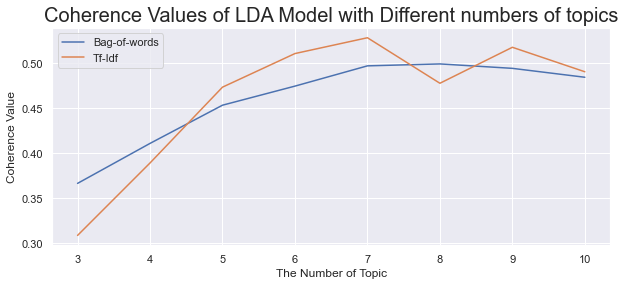

In [5]:
# It takes about 12 mins
ta.find_best_topic_numbers(corpus=corpus)

It has the best Perforamce when num_topics=7 with Tf-Idf Vectorization according to coherence value.
A suitable num_topics of the LDA model with Word of Bags is 7 according to the coherence value.

##### LDA Model with TF-IDF

In [6]:
# Return the fitted LDA Model, Topic Words of each topic, Topic Labels of each speech
tfidf_lda, tfidf_words, tfidf_labels  = ta.LDA_by_Tfidf(n_topics=7,corpus=corpus)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(tfidf_lda, tfidf_corpus, dictionary=tfidf_lda.id2word)
vis

# It shows that LDA Model with tfidf does not lead to a good result as most classes are small and  overlapping


PreparedData(topic_coordinates=              x             y  topics  cluster       Freq
topic                                                    
3      0.078338 -5.064705e-07       1        1  94.710549
0     -0.010618  3.014371e-04       2        1   0.919528
2     -0.014462  9.805035e-05       3        1   0.877712
4     -0.013179 -9.822379e-05       4        1   0.876330
6     -0.013779  1.256164e-05       5        1   0.876244
1     -0.012059 -4.238487e-04       6        1   0.873440
5     -0.014242  1.105299e-04       7        1   0.866198, topic_info=             Term      Freq     Total Category  logprob  loglift
9887        cuban  3.000000  3.000000  Default  30.0000  30.0000
11741        isil  7.000000  7.000000  Default  29.0000  29.0000
9886         cuba  3.000000  3.000000  Default  28.0000  28.0000
131         iraqi  4.000000  4.000000  Default  27.0000  27.0000
2778          gun  5.000000  5.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
820         voter  0.005893  1.861720   Topic7  -9.2870  -1.0067
10748     mueller  0.005577  0.546479   Topic7  -9.3421   0.1640
9044        allen  0.005581  0.657759   Topic7  -9.3413  -0.0206
772     louisiana  0.005597  0.929723   Topic7  -9.3385  -0.3639
1035   indonesian  0.005545  0.727755   Topic7  -9.3477  -0.1282

[488 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
3660       1  1.298994  accomplishment
3661       1  1.136644       addiction
9044       1  1.520313           allen
1425       1  1.029308          attack
286        1  1.272480        attorney
...      ...       ...             ...
11592      1  0.780153      vietnamese
702        1  1.088151        violence
820        1  1.074275           voter
262        1  1.065136             war
7432       1  1.041078          warren

[123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 5, 7, 2, 6])

##### LDA Model with Word-of-Bags

In [7]:
# Return the fitted LDA Model, Topic Words of each topic, Topic Labels of each speech
topic_n = 6
bow_lda, bow_words, bow_labels  = ta.LDA_by_BoW(n_topics=topic_n,corpus=corpus)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(bow_lda, bow_corpus, dictionary=bow_lda.id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.050882 -0.054991       1        1  27.410243
5     -0.100584  0.024291       2        1  20.912228
4     -0.120791 -0.074466       3        1  19.377286
0     -0.013943  0.116942       4        1  18.020037
1      0.107045 -0.040861       5        1   8.282406
2      0.077391  0.029086       6        1   5.997800, topic_info=             Term         Freq        Total Category  logprob  loglift
444        health  1604.000000  1604.000000  Default  30.0000  30.0000
322          care  1656.000000  1656.000000  Default  29.0000  29.0000
1929    insurance   866.000000   866.000000  Default  28.0000  28.0000
475           job  2357.000000  2357.000000  Default  27.0000  27.0000
620        school   843.000000   843.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1091       making    88.729264  1066.679742   Topic6  -5.8254   0.3271
543   opportunity    86.172478  1090.527280   Topic6  -5.8546   0.2757
43           cost    80.996391   697.263586   Topic6  -5.9165   0.6610
422    generation    81.659326   834.957070   Topic6  -5.9084   0.4890
721       working    83.397865  1238.542335   Topic6  -5.8873   0.1157

[535 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
11757      3  0.966030          abadi
8068       3  0.914159  abdulmutallab
9757       2  0.894534            abe
9757       4  0.089453            abe
6429       3  0.914160      acquiring
...      ...       ...            ...
725        5  0.042165          young
725        6  0.082875          young
12108      1  0.056389         yseali
12108      2  0.902220         yseali
10925      6  0.843056        zionist

[1724 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 5, 1, 2, 3])

First, 7 topics were tried due to the tuning result. However, there are some overlaps among several classes. Then, 6 topics were tried and it led to a good result, as the figure shows above.

##### Show Topic Words

In [8]:
label_names = ['Gun Control','Health Care','Edu. and Employment', 'Economy','Military','Human Rights']
for i,item in enumerate(bow_words):
    print('Topic'+str(i+1)+'('+label_names[i]+'): '+', '.join(item))


Topic1(Gun Control): child, god, gun, woman, men, love, war, hope, community, faith, great, young
Topic2(Health Care): health, care, insurance, company, cost, business, job, energy, government, oil, reform, plan
Topic3(Edu. and Employment): job, school, education, child, college, student, africa, future, economy, health, community, energy
Topic4(Economy): job, question, obama, business, economy, tax, lot, government, republican, issue, care, congress
Topic5(Military): security, iran, nuclear, military, isil, iraq, war, terrorist, force, government, weapon, effort
Topic6(Human Rights): peace, young, human, right, government, democracy, future, security, change, war, freedom, leader


# Sentiment Analysis

##### Data Preprocessing and Sentiment Analysis

In [9]:
sa = SentimentAnalysis(obama['speeches'])
senti_speeches = sa.preprocess() # Preprocessing for sentiment analysis
senti_scores = sa.sentiment_score(senti_speeches)  # To get the sentiment scores of each sentence in each speech
senti_props = sa.senti_proportion(senti_scores)   # To get the sentiment distribution of each speech


An example of the result of sentiment scores

In [10]:
senti_dict = {'sentences':senti_speeches[0], 'senti_scores':senti_scores[0]}
df_example = pd.DataFrame(senti_dict)
print(df_example.head(10))

                                           sentences  senti_scores
0                                    Good afternoon.        0.4404
1  Let begin by saying that although this has bee...        0.4847
2  The Civil War was one of the bloodiest in hist...       -0.7184
3                           I don’t oppose all wars.       -0.5574
4  My grandfather signed up for a war the day aft...       -0.7351
5  He saw the dead and dying across the fields of...       -0.6486
6  He fought in the name of a larger freedom, par...        0.6388
7                           I don’t oppose all wars.       -0.5574
8  After September 11th, after witnessing the car...       -0.7579
9  I don’t oppose war in all circumstances, and w...       -0.7964


Each speech was splitted into sentences, and then the compound score of each sentence was calculated by SentimentIntensityAnalyzer from NLTK. The example above shows the result of the first ten sentences in the first speech. The sign indicates its sentiment inclination. Positive value means positive sentiment and vice versa; the size of the absolute value indicates its intensity.

##### Plot the Sentiment Distribution of each speech

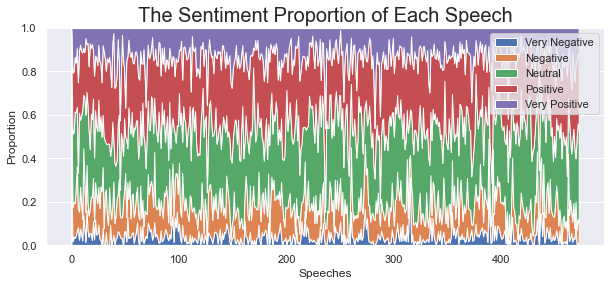

In [11]:
sa.draw_proportion(senti_props)

Based on the sentiment scores, The 'sentiment distribution' for each speech was obtained. sentences with sentiment score above 0.7 will be classified as 'Very Positive' and sentences with sentiment score between 0.2 and 0.7 will be classified as 'Positive' and so on. It shows that the proportion of very negative sentiment is rather small, and generally the postive sentiment has larger proportion


# Data Visualization

##### Obtaining the Data Frames Used in Data Visulazation

In [12]:
dv_dict = {'dates':obama['dates'],'labels':bow_labels,'senti_scores':senti_scores,'senti_proportions':senti_props}
obama_dv = pd.DataFrame(dv_dict)
gdp = pd.read_excel('ExternalData/GDP_Growth_US.xlsx')
unemployment = pd.read_excel('ExternalData/UnemploymentRate.xlsx')
military = pd.read_excel('ExternalData/MilitarySpending.xlsx')

dv = DataVisualization(obama_dv,bow_words,num_topic=topic_n,topic_names=label_names)

f:\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
f:\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
f:\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
f:\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
f:\a

In [13]:
obama_dv

,dates,labels,senti_scores,senti_proportions
0,02 Oct 2002,5,"[0.4404, 0.4847, -0.7184, -0.5574, -0.7351, -0...","[0.2708333333333333, 0.3958333333333333, 0.166..."
1,27 Jul 2004,1,"[0.872, 0.7506, 0.0, 0.0, 0.0, 0.4019, 0.765, ...","[0.018691588785046728, 0.1588785046728972, 0.3..."
2,06 Jan 2005,4,"[0.7351, 0.3182, 0.3612, 0.7902, 0.0, -0.7003,...","[0.04, 0.16, 0.32, 0.28, 0.2]"
3,04 Jun 2005,1,"[0.836, 0.9022, 0.6428, -0.2263, 0.7331, 0.421...","[0.0335195530726257, 0.16201117318435754, 0.41..."
4,25 Oct 2005,1,"[0.0516, -0.5574, 0.4939, 0.6908, 0.0, -0.5719...","[0.045454545454545456, 0.22727272727272727, 0...."
...,...,...,...,...
468,12 Jan 2017,1,"[0.4588, 0.0, 0.9169, 0.25, 0.0, 0.0, 0.3182, ...","[0.03, 0.05, 0.37, 0.3, 0.25]"
469,14 Jan 2017,1,"[0.0, 0.6486, 0.6894, 0.0, 0.7003, 0.7096, -0....","[0.1, 0.1, 0.2, 0.43333333333333335, 0.1666666..."
470,16 Jan 2017,1,"[0.0, 0.8478, 0.0, 0.0, 0.0, 0.0, 0.3818, 0.87...","[0.007246376811594203, 0.06521739130434782, 0...."
471,18 Jan 2017,4,"[0.4404, 0.0, 0.3832, 0.0772, 0.0, 0.0, 0.1027...","[0.010666666666666666, 0.10933333333333334, 0...."


##### Data Visualization on Topics

##### WordCloud of Topic Words

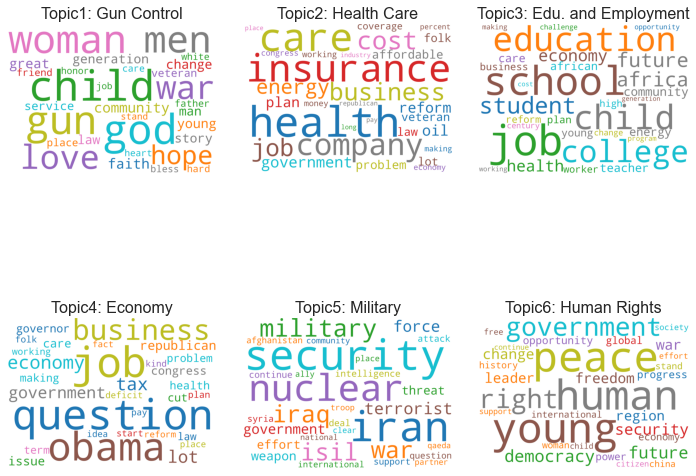

In [14]:
dv.wordcloud(bow_lda)

##### Pie Plot of Topic Proportions

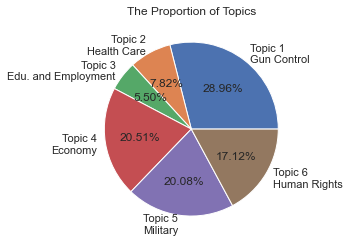

In [15]:
dv.Topic_Pie()

##### Plot the Trends of the Topics

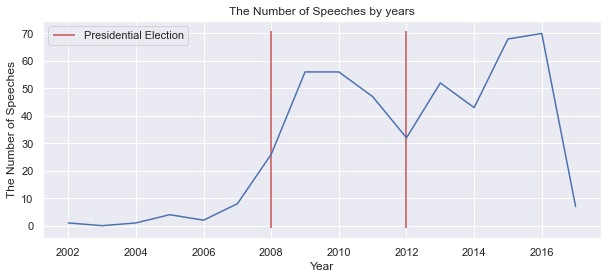

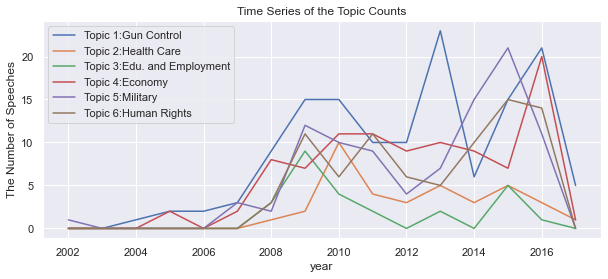

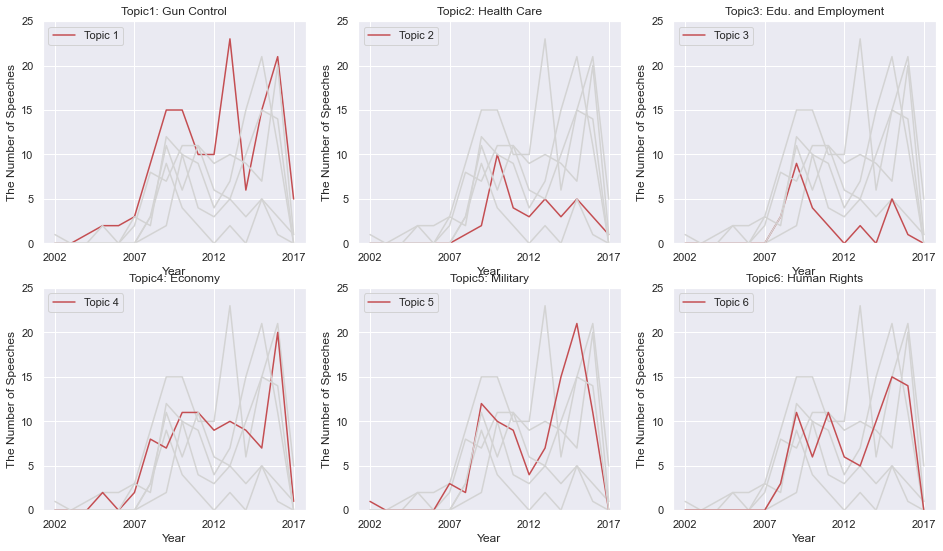

In [16]:
yearly_counts = dv.topic_nums_by_year()

##### Sentiment Visualization: Sentiment Distritubtion of each Topic

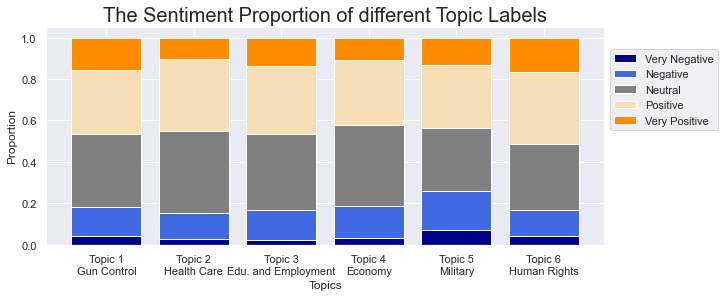

In [17]:
dv.draw_senti_proportion()

##### Data Visualization with External Data

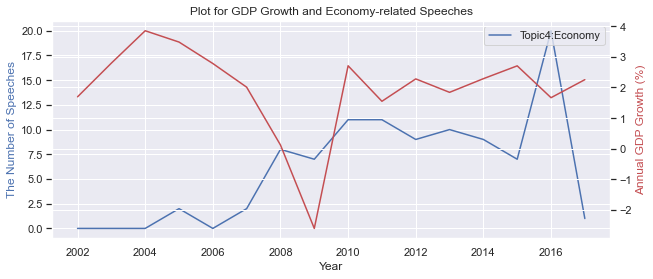

In [18]:
# Economy Issue
dv.topic_external(yearly_counts=yearly_counts,topic_i=4,exdata=gdp,ex_ylabel='Annual GDP Growth (%)',title='Plot for GDP Growth and Economy-related Speeches')

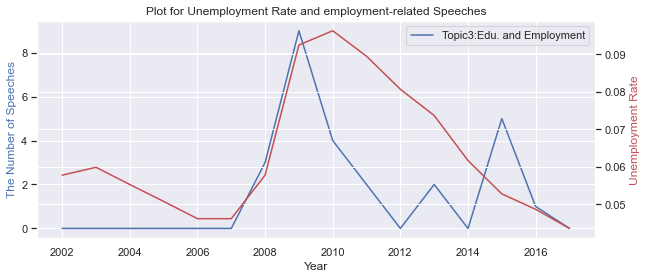

In [19]:
# Job and Education
dv.topic_external(yearly_counts=yearly_counts,topic_i=3,exdata=unemployment,ex_ylabel='Unemployment Rate',title='Plot for Unemployment Rate and employment-related Speeches')

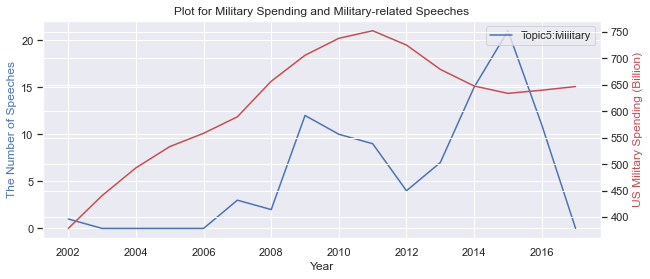

In [20]:
# Military Issue
dv.topic_external(yearly_counts=yearly_counts,topic_i=5,exdata=military,ex_ylabel='US Military Spending (Billion)',title='Plot for Military Spending and Military-related Speeches')

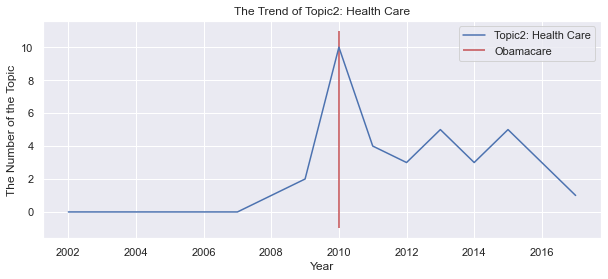

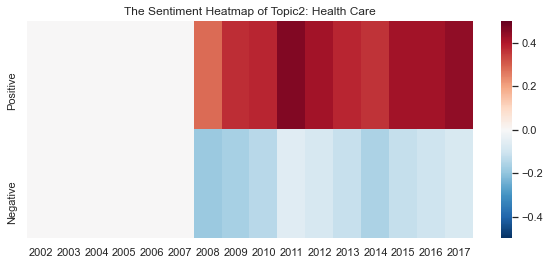

In [21]:
# Health Care Issue
dv.topic_senti_external(yearly_counts=yearly_counts,topic_i=2,event_year=2010,event_label='Obamacare')

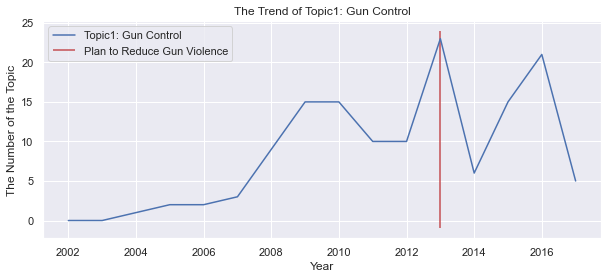

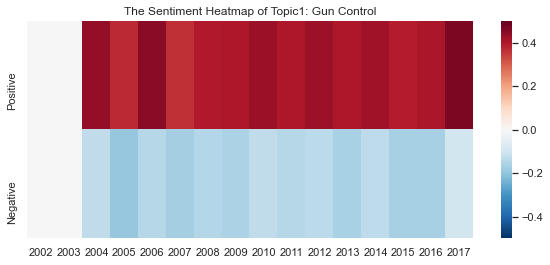

In [22]:
# Violence and Gun Control
dv.topic_senti_external(yearly_counts=yearly_counts,topic_i=1, event_year=2013,event_label='Plan to Reduce Gun Violence')